# Case Study - Titanic


## Table of Contents


[**Step 1: Business Understanding**](#Step-1:-Business-Understanding)

[**Step 2: Data Understanding**](#Step-2:-Data-Understanding)

- [**Load Data**](#Load-Data)
- [**Check Data Quality**](#Check-Data-Quality)
- [**Exploratory Data Analysis-EDA**](#Exploratory-Data-Analysis---EDA)
 

[Back to Top](#Table-of-Contents)

## Step 1: Business Understanding
This initial phase focuses on understanding the project objectives and requirements from a business perspective, and then converting this knowledge into a data mining problem definition, and a preliminary plan designed to achieve the objectives.
#### Titanic Story
The sinking of the RMS Titanic is one of the most infamous shipwrecks in history.  On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew. This sensational tragedy shocked the international community and led to better safety regulations for ships.

One of the reasons that the shipwreck led to such loss of life was that there were not enough lifeboats for the passengers and crew. Although there was some element of luck involved in surviving the sinking, some groups of people were more likely to survive than others, such as women, children, and the upper-class passengers.

#### Objective
In this challenge, we will complete the analysis of what sorts of people were likely to survive. 

In addition, we will build a regression model to predict ticket price(Fare).



[Back to Top](#Table-of-Contents)

## Step 2: Data Understanding
The data understanding phase starts with an initial data collection and proceeds with activities in order to get familiar with the data, to identify data quality problems, to discover first insights into the data, or to detect interesting subsets to form hypotheses for hidden information. This step is often mixed with the next step, Data Preparation.

### Data Dictionary
The data is in a csv file titanic.csv. 

| Variable | Definition | Key |
| --- | --- | --- |
| survival | Survival | 0 = No, 1 = Yes |
| pclass | Ticket class	| 1 = 1st, 2 = 2nd, 3 = 3rd |
| sex | Sex | male/female |	
| Age | Age | in years |
| sibsp | # of siblings / spouses aboard the Titanic | |
| parch | # of parents / children aboard the Titanic | |
| ticket | Ticket number | |
| fare | Passenger fare | |
| cabin | Cabin number | |
| embarked | Port of Embarkation | C = Cherbourg, Q = Queenstown, S = Southampton |

**Variable Notes**
- pclass: A proxy for socio-economic status (SES)
 - 1st = Upper
 - 2nd = Middle
 - 3rd = Lower

- age: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

- sibsp: The dataset defines family relations in this way...
- Sibling = brother, sister, stepbrother, stepsister
- Spouse = husband, wife (mistresses and fiancés were ignored)

- parch: The dataset defines family relations in this way...
 - Parent = mother, father
 - Child = daughter, son, stepdaughter, stepson
 - Some children travelled only with a nanny, therefore parch=0 for them.



### Load Data

This dataset is in titanic.csv. Make sure the file is in current folder. Please download the file from [here](https://github.com/data-lessons/python-business/tree/gh-pages/data) if you haven't done so yet.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
df_titanic = pd.read_csv('titanic-case-study.csv')
df_titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,$7.25,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,$71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,$7.925,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,$53.1,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,$8.05,NaN,S


### Check Data Quality
Check data quality. Most common check is to check missing values. We can do some basic data cleaning like cleaning up currency field.
- Check null values
- Currency field need to be converted to float, remove '$' or ',', sometimes negative value is enclosed in ()


##### Task1: Check out Basic Dataframe Info

Hint: info() function.

Discuss missing values in the dataframe.

In [3]:
df_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    object 
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(1), int64(5), object(6)
memory usage: 83.7+ KB


##### Task2: Clean up Fare, Convert to Float
Strip "$" from Fare, convert datatype to float.

In [4]:
#Removing the dollar sign from the fare column

df_titanic['Fare'] = df_titanic['Fare'].replace('[\$,]', '', regex=True).astype(float)
df_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


##### Task3: Check out statistics of Numeric Columns

Hint:describe() function.

Discuss:
- Age, SibSp, Parch, Fare statistics
- What does mean Survived mean?

In [5]:
df_titanic.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


<font color="blue" size="4">Observations</font> 
- <font color="blue" size="4">The average age for passengers on the ship is 29, the maximum age is 80, and the minimum age is 0 years.</font>
- <font color="blue" size="4">The average number of siblings and spouses on the ship is 0.52, indicating that there were few people who had their siblings and spouses on board. The highest SibSp is 8 people.</font>
- <font color="blue" size="4">The average number of parents and children on the ship is 0.38, suggesting that there were few people who had their parents and children on board. The highest Parch is 6 people.</font>
- <font color="blue" size="4">The average fare paid was 32.2 dollars, with the highest fare being 512.3292 dollars and the lowest fare paid being 0.00.</font>
- <font color="blue" size="4">The survival rate is 38% based on the mean value.</font>


### Exploratory Data Analysis - EDA
EDA is an approach to analyzing data sets to summarize their main characteristics, often with visual methods.

#### Types Of Features
##### Categorical Features:
A categorical variable is one that has two or more categories and each value in that feature can be categorised by them.For example, gender is a categorical variable having two categories (male and female). Now we cannot sort or give any ordering to such variables. They are also known as Nominal Variables.

Categorical Features in the dataset: Sex,Embarked.

##### Continous Feature:
A feature is said to be continous if it can take values between any two points or between the minimum or maximum values in the features column.

Continous Features in the dataset: Fare

### Categorical Features
We will analysis Survived as univariant. Relationship between Sex and Survival, Embarked and Survivval.

#### How many survived
Bar chart on Survived column. There are multiple ways to do the bar chart. We will demonstrate 2 ways here, seaborn countplot and pandas series bar.

##### Task4: Plot bar chart for Perished vs. Survived
Plot bar chart for Survived column. Survived=0 means perished, Survived=1 means Survived.

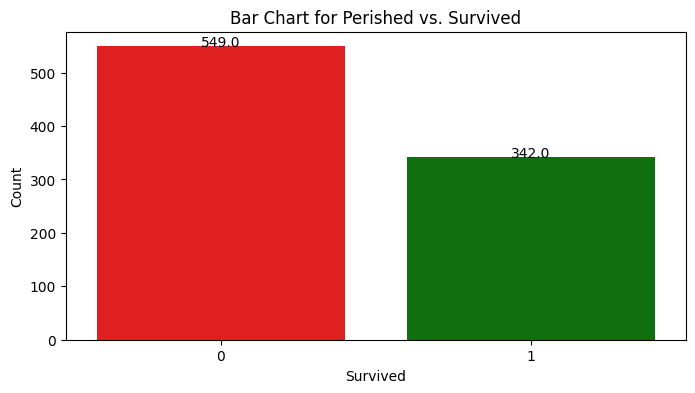

In [6]:
#Bar chart using seaborn showing the count of survived and perished
plt.figure(figsize=(8, 4))
ax = sns.countplot(x='Survived', data=df_titanic, palette={'0': 'red', '1': 'green'})

# Adding data labels
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='baseline')

# Removing grid lines
ax.yaxis.grid(False)

# Adding labels and title
plt.xlabel('Survived')
plt.ylabel('Count')
plt.title('Bar Chart for Perished vs. Survived')

# Display the plot
plt.show()


<font color="blue" size="4">Observations</font>
- <font color="blue">The number of people that survived is 549, and the number of people who died is 342.</font>



#### Relationship between Sex and Survival
We may use aggregation function or plot.

Next 2 cells demonstate aggregate function.

The following cell demonstrates bar plot and countplot.


##### Task5: Plot Bar Chart on Number of Male and Femal Passengers

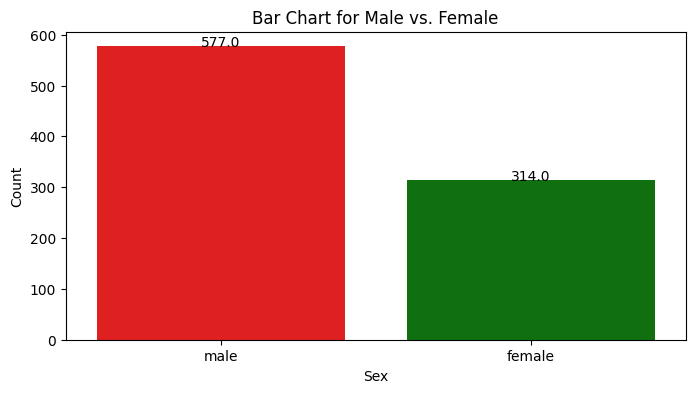

In [7]:
# Plotting the bar chart using seaborn  for the number of Male and Female passengers
plt.figure(figsize=(8, 4))
bx = sns.countplot(x='Sex', data=df_titanic, palette={'male': 'red', 'female': 'green'})

# Removing grid lines
bx.yaxis.grid(False)

# Adding data labels
for p in bx.patches:
    bx.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='baseline')

# Adding labels and title
plt.xlabel('Sex')
plt.ylabel('Count')
plt.title('Bar Chart for Male vs. Female')
plt.show()

- <font color="blue" size="4">Observations</font>
  - <font color="blue">The number of male passengers is 577, and the number of female passengers is 314.</font>


##### Task6: Groupby Sex to Find Survival Rate of Male and Female

In [8]:
# Grouping by 'Sex' and calculating the mean of 'Survived' to get the survival rate
survival_rates = df_titanic.groupby('Sex')['Survived'].mean().reset_index()
survival_rates['Survival Rate (%)'] = survival_rates['Survived'].apply(lambda x: f'{x*100:.2f}%')
survival_rates

,Sex,Survived,Survival Rate (%)
0,female,0.742038,74.20%
1,male,0.188908,18.89%


- <font color="blue" size="4">Observations</font>
  - <font color="blue">There was a higher survival rate for women at 74.20% compared to 18.89% for men, which shows the rescuers were more focused on females than males.</font>


##### Task7: Plot Perished vs. Survived Bar for Male and Female
We will use seaborn countplot() again, but set argument `hue` to 'Survived'.

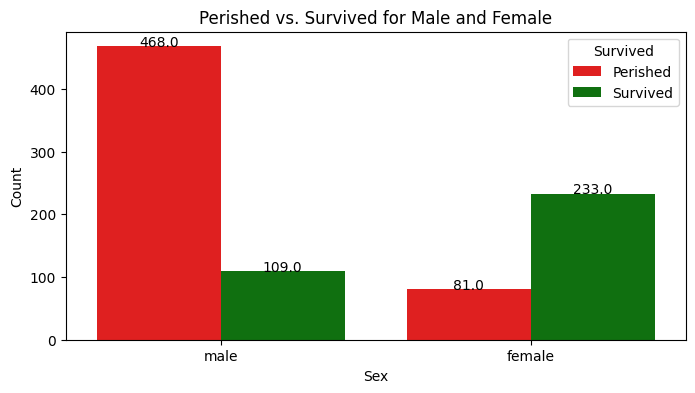

In [9]:
plt.figure(figsize=(8, 4))
dx = sns.countplot(x='Sex', hue='Survived', data=df_titanic, palette={0: 'red', 1: 'green'})

# Removing grid lines
dx.yaxis.grid(False)

for p in dx.patches:
    height = p.get_height()
    if height > 0:
        dx.annotate(f'{height}', (p.get_x() + p.get_width() / 2., height),
                    ha='center', va='baseline')


plt.xlabel('Sex')
plt.ylabel('Count')
plt.title('Perished vs. Survived for Male and Female')
plt.legend(title='Survived', labels=['Perished', 'Survived'])
plt.show()


- <font color="blue" size="4">Observations</font>
  - <font color="blue">From our visualization, we see that more men perished compared to women and more women survived compared to men.</font>


The number of men on the ship is lot more than the number of women. Still the number of survived women is almost twice the number of survived males. Majority women survived while vast majority of men perished.

#### Pclass and Survival
##### Task 8: List survival rate of each Pclass 

In [10]:
survival_rate_Pclass = df_titanic.groupby('Pclass')['Survived'].mean().reset_index()
survival_rate_Pclass['Survival Rate (%)'] = survival_rate_Pclass['Survived'].apply(lambda x: f'{x*100:.2f}%')

survival_rate_Pclass

,Pclass,Survived,Survival Rate (%)
0,1,0.629630,62.96%
1,2,0.472826,47.28%
2,3,0.242363,24.24%


- <font color="blue" size="4">Observations</font>
  - <font color="blue">The survival rate of the first class was the highest at 62.96%, followed by the second class at 47.28%, and the least people to survive were the third class at 24.24%.</font>


##### Task 9: Plot Perished vs. Survived for each Pclass

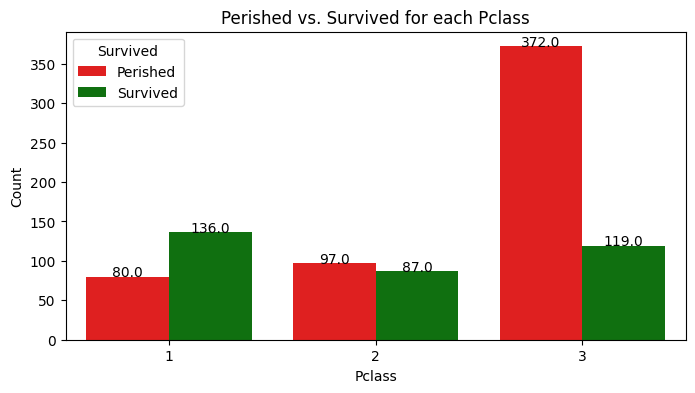

In [11]:
plt.figure(figsize=(8, 4))
ex = sns.countplot(x='Pclass', hue='Survived', data=df_titanic, palette={0: 'red', 1: 'green'})

# Removing grid lines
ex.yaxis.grid(False)

for p in ex.patches:
    height = p.get_height()
    if height > 0:
        ex.annotate(f'{height}', (p.get_x() + p.get_width() / 2., height),
                    ha='center', va='baseline')


plt.xlabel('Pclass')
plt.ylabel('Count')
plt.title('Perished vs. Survived for each Pclass')
plt.legend(title='Survived', labels=['Perished', 'Survived'])
plt.show()

- <font color="blue" size="4">Observations</font>
  - <font color="blue">There are more deaths in the 3rd class compared to the first and second class.</font>


### Continuous Features


#### Univariate Distribution Plot
There are multiple ways to do histogram. I will demonstrate 3 ways.
- ax.hist(): can not handle NnN value
- seaborn.distplot(): can not handle NaN. Has KDE(kernel density estimation) by default.
- pd.Sereis.hist(): simplest and can handle NaN by default

##### Task 10: Plot histogram for Age
Use pandas Series hist() function which handles missing value.

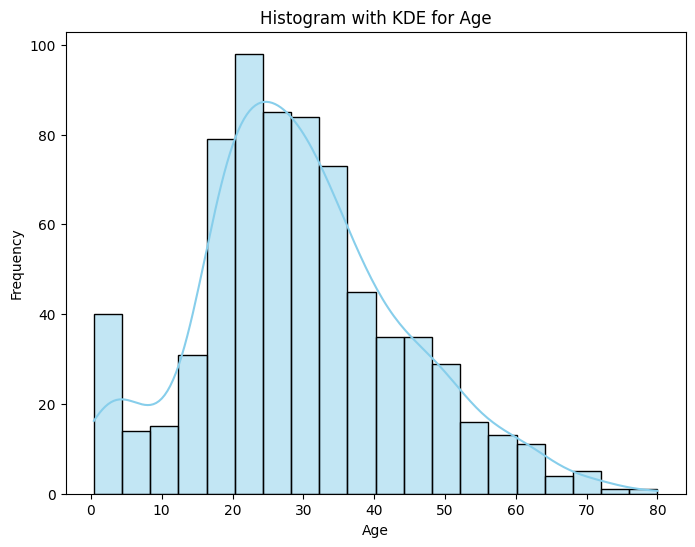

In [13]:
plt.figure(figsize=(8, 6))

# Plotting the histogram
fx = sns.histplot(df_titanic['Age'], bins=20, kde=True, color='skyblue', edgecolor='black')

# Adding labels and title
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Histogram with KDE for Age')

plt.show()


- <font color="blue" size="4">Observations</font>
  - <font color="blue">The age group that had the highest passengers is between 20 to 30.</font>


##### Task11: Stack age histogram of survived on top of overall age histogram
Plot histogram for Age, then filter out survived passenger and plot histogram for Age on same axis. Set different color and label.

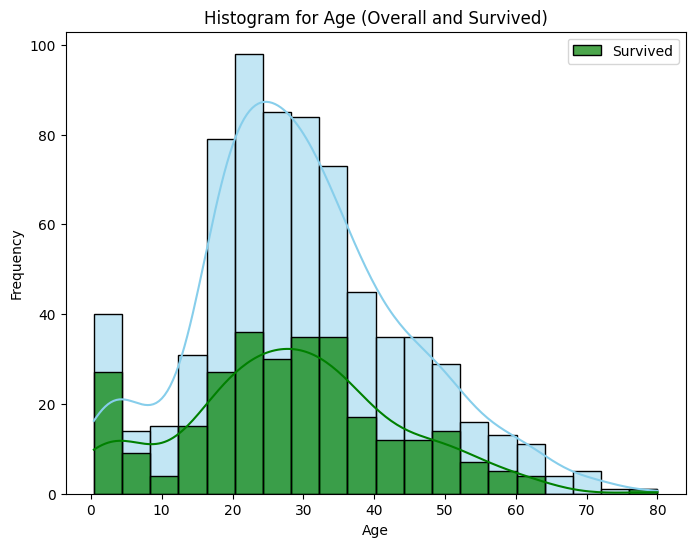

In [15]:
# Overall age histogram
plt.figure(figsize=(8, 6))
gx = sns.histplot(df_titanic['Age'], bins=20, kde=True, color='skyblue', edgecolor='black')


# Filter survived passengers based on age
survived_age = df_titanic[df_titanic['Survived'] == 1]['Age']

# Age histogram for survived passengers
sns.histplot(survived_age, bins=20, kde=True, color='green', edgecolor='black', alpha=0.7, label='Survived')

plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Histogram for Age (Overall and Survived)')
plt.legend()
plt.show()


Children have higher survival rate.

[Back to Top](#Table-of-Contents)
